In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from geopy import distance
import networkx as nx

In [2]:
# Distances are in meters
header_list = ["Start", "End", "Start_Lat", "Start_Long", "End_Lat", "End_Long",  "Dist"]
buildings_df = pd.read_csv('data/campus_paths.txt', sep=" ", header=None, names=header_list)
buildings_df.head(2)

,Start,End,Start_Lat,Start_Long,End_Lat,End_Long,Dist
0,Abel_Wolman_House,Steinwald_House,39.327692,-76.617195,39.327575,-76.617256,13.980812
1,Ames_Hall,Krieger_Hall,39.328583,-76.620791,39.328616,-76.619988,69.154715


In [3]:
# This calculates the distance based on geospatial coordinates and compares it to
# listed distance in the dataframe. Should be very close.

def compare_dist(i):
    expected = buildings_df["Dist"][i]
    
    c1 = np.array([buildings_df["Start_Lat"][i], buildings_df["Start_Long"][i]])
    c2 = np.array([buildings_df["End_Lat"][i], buildings_df["End_Long"][i]])

    actual = distance.distance(c1, c2).meters
    print(expected, actual)

In [4]:
G=nx.from_pandas_edgelist(buildings_df, 'Start', 'End', 'Dist') 

In [5]:
pos = {}

for n in G.nodes():
    l1 = buildings_df.loc[buildings_df['Start'] == n].index.tolist()
    l2 = buildings_df.loc[buildings_df['End'] == n].index.tolist()
    
    if len(l1) > 0:
        coords = (buildings_df['Start_Lat'][l1[0]], buildings_df['Start_Long'][l1[0]])
    else:
        coords = (buildings_df['End_Lat'][l2[0]], buildings_df['End_Long'][l2[0]])
    
    pos[n] = (coords)

print(pos)

{'Abel_Wolman_House': (39.327692, -76.617195), 'Steinwald_House': (39.327575, -76.617256), 'Ames_Hall': (39.328583, -76.620791), 'Krieger_Hall': (39.328616, -76.619988), 'AMR3': (39.331919, -76.619787), 'AMR2': (39.331473, -76.619129), 'AMR1': (39.330674, -76.618483), 'Baltimore_Museum_of_Art': (39.325996, -76.619503), 'Shriver_Hall': (39.326415, -76.620265), 'Barnes_&_Noble': (39.328314, -76.616263), 'Charles_Commons': (39.328522, -76.616383), 'Barton_Hall': (39.327139, -76.620651), 'Hackerman_Hall': (39.326873, -76.620916), 'Bloomberg_Center_for_Physics_&_Astronomy': (39.331695, -76.623356), 'Steven_Muller_Bldg.': (39.33281, -76.623356), 'BMA_Sculpture_Garden': (39.325996, -76.619503), 'Bradford_Apts.': (39.328459, -76.615658), 'Brody_Learning_Commons': (39.328421, -76.619335), 'Merrick_Barn': (39.328101, -76.619), 'Bunting_Meyerhoff_Interfaith_and_Community_Service_Center': (39.331876, -76.617398), 'Rogers_House': (39.331138, -76.616699), 'Chemistry_Bldg.': (39.330336, -76.621444), 

In [6]:
nx.set_node_attributes(G, pos, "pos")

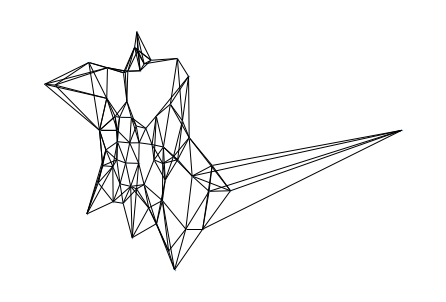

In [8]:
nx.draw(G, pos, node_size = .1, with_labels = False)